# Self-similar profiles

## Tutorial that shows how to use hydro_bubbles.py to compute the 1d profiles for a range of wall velocities and a phase transition strength alpha

### Created by Alberto Roper Pol (alberto.roperpol@unige.ch), 29/08/2024

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
HOME = os.getcwd()

os.chdir('../..')
import plot_sets
import hydro_bubbles as hb
os.chdir(HOME)

# reference values
cs2 = 1/3
cs = np.sqrt(cs2)

# reference colors
cols = hb.cols_ref

# colors used for the paper ...

cmap = plt.get_cmap('rainbow_r')
vws = np.linspace(0.32, .8, 13)
y = (vws - 0.32)/(0.8 - 0.32)
cols = cmap(y)

darken_factor = 0.7  # Adjust this factor to control darkness
cols = tuple(component * darken_factor for component in cols)

In [ ]:
### compute the 1d profiles of the fluid perturbations

## we first compute the 1d profiles (velocity and energy fluctuations lambda)
## for a chosen alpha and range of vws

alpha = 0.0046
vws = np.linspace(0.36, .8, 12)
# define string of vws for saving file
str_vws = ['036', '04', '044', '048', '052', '056', '06', '064', '068', '072', '076', '08']
str_alp = '00046'
Nxi = 10000

xis, vvs, ws, alphapl, conv, shocks, xifs, wms, kappas, omegas = \
       hb.compute_profiles_vws(alpha, vws=vws, cs2=cs2, plot=False, plot_v='both', cols=[], meth=2,
                               alphan=True, lam=False, eff=True, quiet=True, tol=1e-5, max_it=30, Nxi=Nxi, Nxi2=2*Nxi,
                               save=True, strs_vws=str_vws, str_alp=str_alp)

types = hb.type_nucleation(vws, alpha, cs2=cs2)

3 iterations for vw= 0.36  and alpha=  0.0046
alpha: 0.004600012549210328 , alpha_+: 0.004536001538899887
results of 1d profile saved in  results/1d_profiles/alpha_00046_vw_036.csv
3 iterations for vw= 0.4  and alpha=  0.0046
alpha: 0.004600032407470411 , alpha_+: 0.004512256077478789
results of 1d profile saved in  results/1d_profiles/alpha_00046_vw_04.csv
4 iterations for vw= 0.44  and alpha=  0.0046
alpha: 0.004599997645495893 , alpha_+: 0.004476619531355962
results of 1d profile saved in  results/1d_profiles/alpha_00046_vw_044.csv


Text(0, 0.5, '$v (\\xi)$')

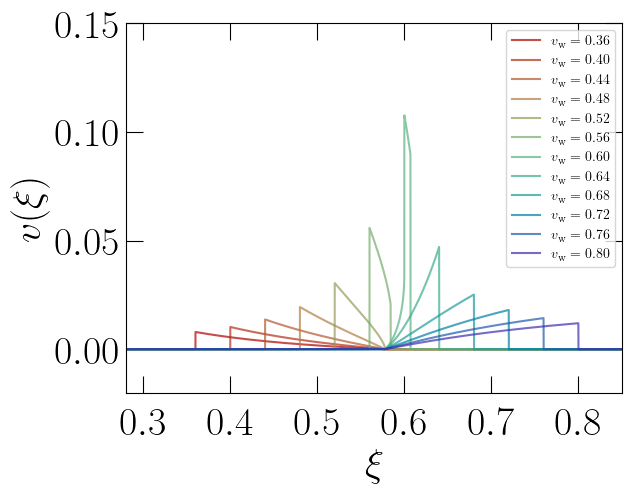

In [41]:
# we can plot the 1d profiles

for i in range(0, len(vws)):
    plt.plot(xis, vvs[i, :], label=r'$v_{\rm w} = %.2f$'%vws[i], color=cols[i])
plot_sets.axes_lines()
plt.xlim(0.28, 0.85)
_ = plt.xticks(np.linspace(0.3, 0.8, 6))
plt.legend(fontsize=10)
plt.ylim(-0.02, 0.15)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$v (\xi)$')